In [92]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [5]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [14]:
# target values from training data
survived_train = train_df.Survived

In [15]:
# combine training and testing datasets
# drop Survived column from training set
data = pd.concat([train_df.drop(['Survived'], axis=1), test_df])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [17]:
# Fare and Age columns are missing values
# Cabin and Embarked columns are missing values

In [18]:
# filling in missing data for Fare and Age columns using columns median value
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [20]:
# encode male/female values under Sex feature with 0/1
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [21]:
# select ['Sex_male', 'Fare', 'Age','Pclass', 'SibSp'] columns to build first model
data = data[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
Sex_male    1309 non-null uint8
Fare        1309 non-null float64
Age         1309 non-null float64
Pclass      1309 non-null int64
SibSp       1309 non-null int64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 92.4 KB


In [23]:
# all columns are non-null now

In [25]:
# build decision tree classifier

In [26]:
# split data into train/test sets
train_data = data.iloc[:891]
test_data = data.iloc[891:]

In [97]:
# get list of values for scikit-learn classifier
X = train_data.values
test = test_data.values
y = survived_train.values

In [98]:
# instantiate model and fit to data
clf = tree.DecisionTreeClassifier(max_depth=10)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [99]:
# make predictions on test set and save to Survived column of test set
Y_pred = clf.predict(test)
test_df['Survived'] = Y_pred

In [68]:
# save PassengerId and Survived columns to csv file for submission to Kaggle
test_df[['PassengerId', 'Survived']].to_csv('predictions/1st_decision_tree_10.csv', index=False)

In [69]:
# predictions submitted to Kaggle
# score: 0.77990 accuracy

In [70]:
# changed max_depth to 6 (double)

In [71]:
# predictions submitted to Kaggle
# score:  0.78468 accuracy

In [72]:
# changed max_depth to 12 (double)

In [73]:
# predictions submitted to Kaggle
# score:  0.74162 accuracy

In [74]:
# changed max_depth to 9 (less 3)

In [75]:
# predictions submitted to Kaggle
# score:  0.79904 accuracy

In [76]:
# changed max_depth to 10 (plus 1)

In [77]:
# predictions submitted to Kaggle
# score:  0.78468 accuracy

In [78]:
# max_depth of 9 seems to provide highest accuracy score

In [90]:
# use train_test_split method on comibned datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

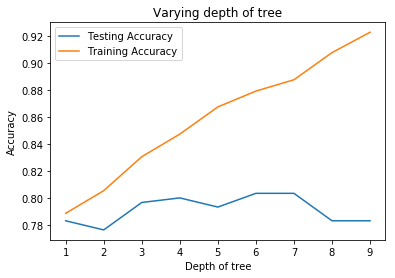

In [95]:
# plot accuracies of test datasets given range of max_depth from 1 to 9
dep = np.arange(1, 10)

train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

for i, k in enumerate(dep):
    clf = tree.DecisionTreeClassifier(max_depth=k)
    
    clf.fit(X_train, y_train)

    # get accuracy of train set
    train_accuracy[i] = clf.score(X_train, y_train)

    # get accuracy of test set
    test_accuracy[i] = clf.score(X_test, y_test)

# plot accuracy results
plt.title('Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# max_depth -- bias-variance trade-off (overfitting/underfitting)
# note: when I used full training set and full test set from Kaggle I get highest accuracy at max_depth 9
# seems that size of dataset changes the bias-variance trade-off

In [83]:
# visual decision tree using graphviz
import graphviz

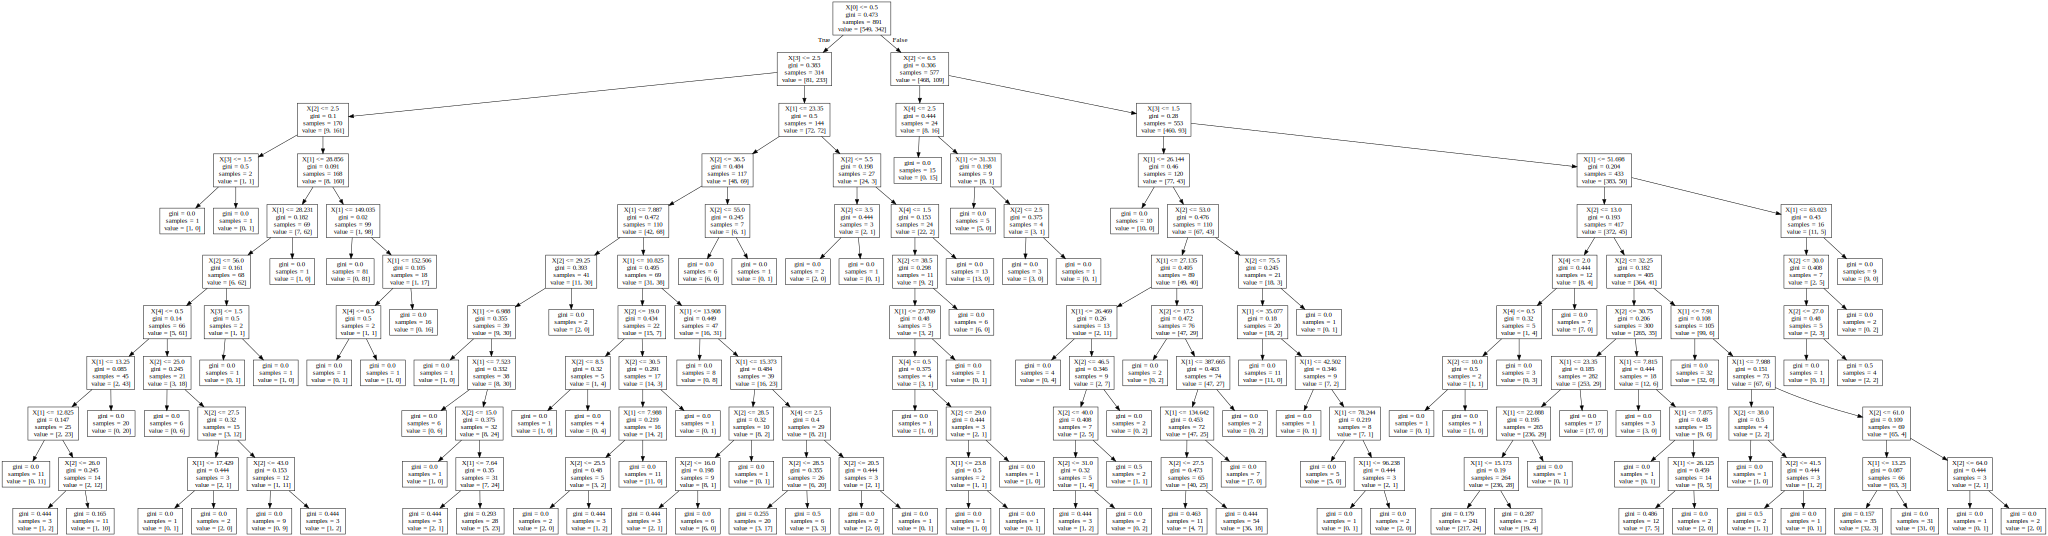

In [101]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('titanic')
graph